In [42]:
import pandas as pd
df = pd.read_csv('datasets/P4_winequality.csv')

In [43]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X)
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[5 5 5 ... 6 5 6]


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores = []
k_values = range(1,40)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores

[0.615625,
 0.56875,
 0.6,
 0.615625,
 0.60625,
 0.565625,
 0.565625,
 0.56875,
 0.56875,
 0.559375,
 0.578125,
 0.6,
 0.571875,
 0.584375,
 0.571875,
 0.59375,
 0.58125,
 0.59375,
 0.59375,
 0.6125,
 0.596875,
 0.61875,
 0.6125,
 0.625,
 0.615625,
 0.609375,
 0.6125,
 0.63125,
 0.61875,
 0.625,
 0.615625,
 0.61875,
 0.61875,
 0.625,
 0.61875,
 0.61875,
 0.615625,
 0.628125,
 0.6]

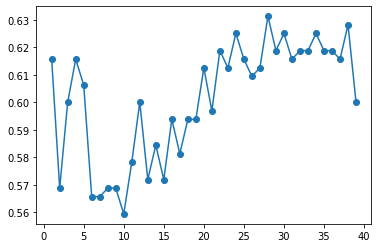

In [48]:
import matplotlib.pyplot as plt
plt.plot(k_values,scores, marker='o')